In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [71]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data=data.drop('Unnamed: 32', axis=1)
y=data.diagnosis
X=data.drop('diagnosis', axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [4]:
X.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
X=X.drop('id', axis=1)
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)
X_val1,X_test,y_val1,y_test=train_test_split(X_val,y_val,test_size=0.5, random_state=42)
print('train set: ', X_train.shape,y_train.shape)
print('test set: ', X_test.shape, y_test.shape)
print('val1 set: ', X_val1.shape, y_val1.shape)

train set:  (455, 30) (455,)
test set:  (57, 30) (57,)
val1 set:  (57, 30) (57,)


# 1. ANN

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, Input, Dense, Dropout,Add, BatchNormalization 

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [12]:
callbacks=[EarlyStopping(patience=200,
                        min_delta=0.00001,
                        restore_best_weights=True),
          ReduceLROnPlateau(factor=0.5, patience=200)]

In [13]:
input_tensor=Input(shape=(30,))
D1=Dense(512, input_shape=(30,))(input_tensor)
A1=Activation('relu')(D1)
A1=Dropout(0.5)(A1)
A1=BatchNormalization()(A1)
D2=Dense(512)(A1)
A2=Activation('relu')(D2)
A2=Dropout(0.5)(A2)
A2=BatchNormalization()(A2)
D3=Dense(512)(A2)
A3=Activation('relu')(D3)
A3=Dropout(0.5)(A3)
A3=BatchNormalization()(A3)
D4=Dense(512)(A3)
D4=Add()([D4,A1])
A4=Activation('relu')(D4)
A4=Dropout(0.5)(A4)
A4=BatchNormalization()(A4)


D5=Dense(256)(A4)
A5=Activation('relu')(D5)
A5=Dropout(0.2)(A5)
A5=BatchNormalization()(A5)
D6=Dense(256)(A5)
A6=Activation('relu')(D6)
A6=Dropout(0.2)(A6)
A6=BatchNormalization()(A6)
output_tensor=Dense(1, activation='sigmoid')(A6)

functional_model=Model(inputs= input_tensor,
                      outputs=output_tensor)


In [15]:
functional_model.compile(loss='binary_crossentropy',
                        optimizer='adam',
                        metrics=['binary_accuracy'])

In [16]:
history=functional_model.fit(X_train,y_train,
                    validation_data=(X_val1,y_val1),
                    epochs=500,
                    batch_size=128,
                    callbacks=callbacks)

Epoch 1/500
4/4 [==============================] - 3s 165ms/step - loss: 0.7212 - binary_accuracy: 0.6080 - val_loss: 7.4020 - val_binary_accuracy: 0.4737
Epoch 2/500
4/4 [==============================] - 0s 45ms/step - loss: 0.3430 - binary_accuracy: 0.8582 - val_loss: 8.5748 - val_binary_accuracy: 0.4737
Epoch 3/500
4/4 [==============================] - 0s 44ms/step - loss: 0.3003 - binary_accuracy: 0.8875 - val_loss: 8.0463 - val_binary_accuracy: 0.4737
Epoch 4/500
4/4 [==============================] - 0s 43ms/step - loss: 0.2713 - binary_accuracy: 0.8960 - val_loss: 6.5700 - val_binary_accuracy: 0.4737
Epoch 5/500
4/4 [==============================] - 0s 42ms/step - loss: 0.2576 - binary_accuracy: 0.8960 - val_loss: 4.7083 - val_binary_accuracy: 0.4737
Epoch 6/500
4/4 [==============================] - 0s 40ms/step - loss: 0.2691 - binary_accuracy: 0.8948 - val_loss: 3.1874 - val_binary_accuracy: 0.4912
Epoch 7/500
4/4 [==============================] - 0s 40ms/step - loss: 0.2

<AxesSubplot:>

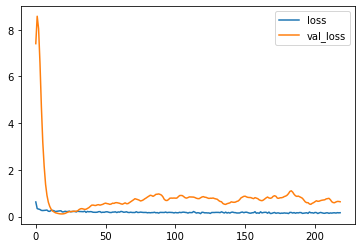

In [17]:
history_df=pd.DataFrame(history.history)
history_df[['loss','val_loss']].plot()


**Overfitting:** The production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably.[1]
The curve of the model can be an example of overfitting.(See Figure 1). Lower epochs (15-20) would probably improve the accuracy of the model.

<img src= "https://i.imgur.com/tHiVFnM.png" alt ="Curves" style='width: 500px;'>

Figure 1

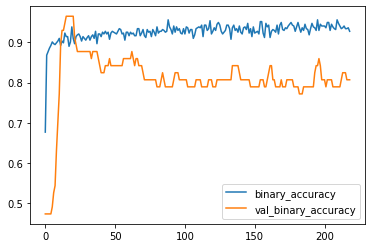

In [25]:
history_df[['binary_accuracy','val_binary_accuracy']].plot();

In [20]:
from sklearn.metrics import mean_squared_error
preds=functional_model.predict(X_test)
np.sqrt(mean_squared_error(preds,y_test))

0.16612618888540173

In [47]:
error=0.16612618888540173

# 2. XGBoost

In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
preds=xgb.predict(X_val)
print('XGB Accuracy: ',np.sqrt(mean_squared_error(preds,y_val)))

[09:57:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Accuracy:  0.20942695414584775


# 2.1.Boosting the Accuracy

In [43]:
grid_params={'n_estimators': [100,200,300,400,50],
            'learning_rate': [0.010,0.001,0.0001,1],
            'max_depth':[5,6,4,7]}
grid_model=GridSearchCV(estimator=XGBClassifier(),param_grid=grid_params,cv=3)
grid_model.fit(X_train,y_train)
grid_model.best_params_

[10:04:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 400}

In [51]:
xgb_optimized=XGBClassifier(learning_rate= 0.01, max_depth= 4, n_estimators=400)
xgb_optimized.fit(X_train,y_train)
preds=xgb_optimized.predict(X_val)
error2=np.sqrt(mean_squared_error(preds,y_val))
print('Error of the optimized XGBClassifier model: ', str(error2))

[10:12:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Error of the optimized XGBClassifier model:  0.20942695414584775


# 3.RandomForest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
grid_params={'n_estimators': [100,200,300,400,50],
            'max_depth':[5,6,4,7]}
grid_model=GridSearchCV(estimator=rf,param_grid=grid_params,cv=3)
grid_model.fit(X_train,y_train)
grid_model.best_params_




{'max_depth': 7, 'n_estimators': 100}

In [64]:
rf_optimized=RandomForestClassifier(max_depth= 7, n_estimators= 100)
rf_optimized.fit(X_train,y_train)
preds=rf_optimized.predict(X_val)
error3=np.sqrt(mean_squared_error(preds,y_val))
print('Error of the Optimized Random Forest Model: ', error3)


Error of the Random Forest Model:  0.1873171623163388


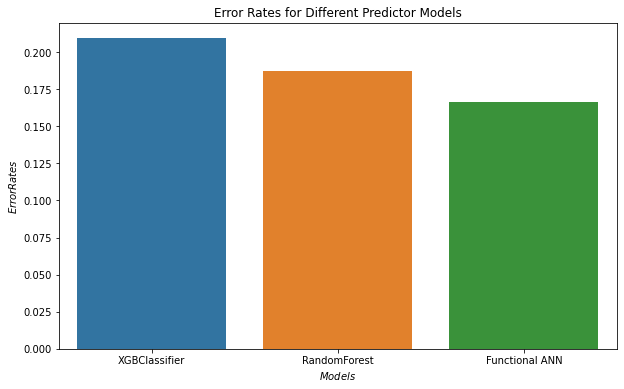

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(x=['XGBClassifier','RandomForest','Functional ANN',],y=[error2,error3,error])
plt.title('Error Rates for Different Predictor Models')
plt.xlabel('$Models$')
plt.ylabel('$Error Rates$')
plt.show()

# References:


[1] https://www.lexico.com/definition/overfitting